## **Trabajo final de Herramientas matematicas y computacionales para I.A.**

### **Team conciencIA**

Samir Hassan - 2190041

Gabriel Jeannot - 2185887

Carlos Osorio - 2230894

Luis Pareja - 2185833

Diego Perea - 2185751

# Punto 1

1.    Para el primer punto, una vez leido el articulo y buscado en internet. Se ha determinado por escoger un data set de kaggle.com, el cual cumple con un patron lineal de los datos expuestos de manera multivariable. Este data set, esta hecho para predecir las ventas de compañías en función del presupuesto de marketing invertido en redes sociales (YouTube, Facebook y periódico), por lo cuál, a manera de puesta en práctica y demostración, es un grupo de datos muy interesante para probar la regresion lineal multivariable.

Por favor seleccionar de la carpeta que se adjunto en el parcial, el data set llamado 'Marketing_Data.csv' para poder ejercutar el primer punto, debido a que este data set se almaceno localmente.

In [ ]:
import numpy as np #Se importa la biblioteca de numpy
import matplotlib.pyplot as plt #Se importa la biblioteca de matplotlib
import pandas as pd #Se importa la biblioteca de pandas
from google.colab import drive #
drive.mount('/content/drive/') 
print("Por favor seleccionar de la carpeta que se adjunto en el parcial, el data set llamado 'Marketing_Data.csv' para poder ejercutar el primer punto, debido a que este data set se almaceno localmente.")
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  print(f"Archivo {filename} cargado exitosamente")

mu = []
std = []

Mounted at /content/drive/
Por favor seleccionar de la carpeta que se adjunto en el parcial, el data set llamado 'Marketing_Data.csv' para poder ejercutar el primer punto, debido a que este data set se almaceno localmente.


Saving Marketing_Data.csv to Marketing_Data.csv
Archivo Marketing_Data.csv cargado exitosamente


In [ ]:
def plot_data(x, y): #Se define una funcion para graficar los datos y evaluar la viabilidad de la RL en este caso.
	plt.xlabel('y') #Se nombra eje x
	plt.ylabel('Sales') #Se nombra el eje Y
	plt.plot(x[:,0], y, 'bo', label='Youtube') #Se realiza la grafica solo en función de los datos de la columna Youtube
	plt.plot(x[:,1], y, 'ro', label='Facebook')
	plt.plot(x[:,2], y, 'go', label='Newspaper')
	plt.show() #Se muestra la gráfica

In [ ]:
def normalize(data): #Se procede a crear la función de normalizacion posteriomente llamada.
	for i in range(0,data.shape[1]-1): #Se crea un ciclo para recorrer el conjunto de los datos.
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i])) #Z = (X - μ) / σ, donde μ = media y σ= desviacion estandar.
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))

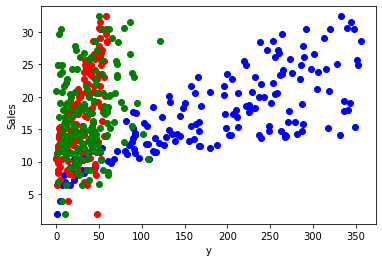

(array([[-0.9133766 , -0.47430395,  0.55255749],
        [ 1.69808742,  0.35207403,  0.66854624],
        [-0.41645835, -0.38024467,  0.44623448],
        [-0.60089373, -1.44848939,  0.03060814],
        [ 1.37738131, -0.20556315, -1.40475257],
        [-0.61851494, -1.45520791, -1.0616192 ],
        [ 1.67224297, -1.27380786, -1.0084577 ],
        [ 1.39265303,  1.39344467, -1.17760795],
        [-0.86521195,  1.7696818 ,  0.78936785],
        [-1.23643221,  0.24457771,  0.27708422],
        [ 0.9356762 ,  0.98361493,  0.12726543],
        [ 0.63611555, -0.05103718,  0.10793397],
        [ 0.3365549 ,  0.69471856,  0.45106734],
        [ 1.70631066,  0.31176291, -1.33225961],
        [ 0.68780444, -0.98491149, -0.14337498],
        [-1.44788678,  0.17739251,  0.6733791 ],
        [ 0.31423469, -0.03760014,  0.10310111],
        [-0.6889998 , -0.88413369,  0.30608141],
        [ 1.07547117,  1.2389187 , -0.52517126],
        [ 0.92627822, -0.48774099,  0.99234815],
        [-0.95684226

In [ ]:
#filename= "/content/drive/MyDrive/2023_1_HMCIA_conciencIA_TrabajoFinal/Marketing_Data.csv"
def load_data(filename): #Se crea una función para cargar el data-set
	df = pd.read_csv(filename, sep=",", index_col=False) #Se lee el archivo donde se encuentran los datos
	df.columns = ["youtube", "facebook", "newspaper", "sales"] #Se definen las columnas con las variables del data set
	data = np.array(df, dtype=float) #Se crea un arreglo del conjunto de datos
	plot_data(data[:,:3], data[:, -1]) #Se usa para graficar una RL multivariante y su etiqueta (Y)
	normalize(data) #Se normalizan sus valores para un correcto entrenamiento del modelo y evitar desequilibrios.
  #Comentario: Normalizacion de caracteristicas: Z = (X - μ) / σ, donde μ = media y σ= desviacion estandar.
	return data[:,:3], data[:, -1] #Devuelve X (varaibles para predecir) y Y (su etiqueta o salida).

load_data(filename)

Comentario: Como se pudo observar en la grafica realizada anteriormente, los datos cumplen con un patron de crecimiento lineal o en pendiente, y aunque muestra una mayor dispersion de estos a medida que aumentan las entradas (X), sigue con la misma tendencia de crecimiento la cual es posible ajustar aproximadamente, trazando una linea.

Comentario: Para el desarrollo de la hipotesis, segun el data set de tres caracteristicas, es el siguiente: hθ ( x ) = θ0 + θ1x1 + θ2x2 + 03x3. Esto se pondra, segun el articulo, en una funcion de python que regresa la hipotesis.

In [ ]:
def h(x,theta): #Funcion de hipotesis de RL.
	return np.matmul(x, theta) #Funcion de numpy multiplicacion matricial.

Comnentario: Se realiza la función de costo descrita en el articulo, la cual evaluara la calidad del modelo.

In [ ]:
def cost_function(x, y, theta): #Se define el nombre de la funcion de costo
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0]) #Regresa el costo del modelo de RL.

Comentario: Se realiza la funcion de gradiente de descenso usada en el articulo solicitado, el cuál tendra como función ajustar los parámetros para minimizar la función de costo

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10): #Se define la funcion de gradiente de descenso
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs): #Se realiza un ciclo en funcion del numero de epocas.
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y)) #Funcion de costo
		theta = theta - (learning_rate)*cost_ #Vector de parametros de 0s para la hipotesis
		J_all.append(cost_function(x, y, theta))

	return theta, J_all #retorna los valores de theta (vector de parametros) y J_all (lista que contiene función de costo despues de cada epoca)

In [ ]:
mu = []
std = []

def test(theta, x): #Se define la función de test, con el fin de poner a prueba el modelo y predecir algunos valores reales (inventados por nosotros).
  x[0] = (x[0] - mu[0])/std[0] #Variable independiente 'youtube'.
  x[1] = (x[1] - mu[1])/std[1] #Variable independiente 'facebook'.
  x[2] = (x[2] - mu[2])/std[2] #Variable independiente 'periodico'.
	
  y= theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] #Le da el valor a predecir de la cantidad de ventas en una compañia, a partir de las variables independientes 'x'.
  print("Company sales: ", y)

In [ ]:
def plot_cost(J_all, num_epochs): #Se define una función para plotear la grafica de costo
	plt.xlabel('Epochs') #Se nombra el eje x
	plt.ylabel('Cost') #Se nombra el eje y
	plt.plot(num_epochs, J_all, 'm', linewidth = "3") #Se configura la grafica
	plt.show() #Se muestra la grafica

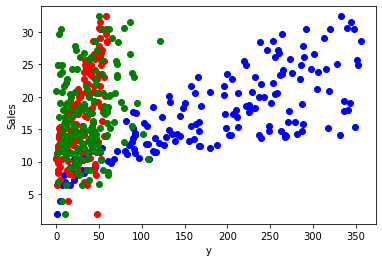

Cost:  [[1.97822241]]
Parameters:  [[16.83559067]
 [ 4.59463357]
 [ 3.32418679]
 [ 0.15657126]]


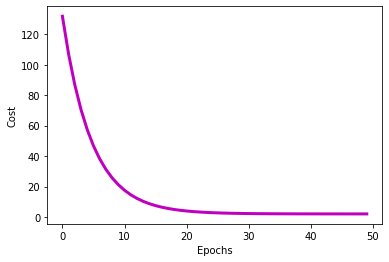

[2.1814908554038162e-16, 2.5970129230997812e-17, -1.0388051692399125e-16]
Company sales:  [631.15753301]


In [ ]:
#filename= "/content/drive/MyDrive/2023_1_HMCIA_conciencIA_TrabajoFinal/Marketing_Data.csv" #Se define la ruta del datas set
x,y = load_data(filename) #Se llama la funcion load_data para cargar en x y y los valores del dataset.
y = np.reshape(y, (171,1)) #Se aplica un reshape al conjunto de datos.
x = np.hstack((np.ones((x.shape[0],1)), x)) #Agrega una columna adicional de unos (1) 
theta = np.zeros((x.shape[1], 1)) #Inicializa el vector de theta con ceros.
learning_rate = 0.1 #Se especifica la tasa de aprendizaje del modelo
num_epochs = 50 #Se define el numero de epocas para el entrenamiento
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs) #Se llama a la funcion de descenso de gradiente que devuelve un historial de todas las funcionesde costo y el vector final de parametros theta
J = cost_function(x, y, theta) #Define el valor de la funcion de costo
print("Cost: ", J) #Imprime el valor de J
print("Parameters: ", theta) #Imprime los valores de theta (vector)


#Comentario: A modo de evaluar el cambio en la funcion de costo de acuerdo a las epocas de entrenamiento del modelo, se realiza un grafico que plotea la vairable J_all, la cual se define como el historial de de todos esos
#resultados de la función de costo. Por tanto, con este grafico, se puede observar como dichos valores en la función de costo disminuyen progresivamente en cada epoca.

#for testing and plotting cost 
n_epochs = [] #Se define un arreglo para el numero de epocas del modelo RL.
jplot = [] #Se define un arreglo para los valores de la funcion de costo en cada epoca.
count = 0 #Contador del ciclo
for i in J_all: #Se define el ciclo for
	jplot.append(i[0][0]) #Se inicia la grafica en Y.
	n_epochs.append(count) #Se inicia la grafica en X
	count += 1 #Contador +1
jplot = np.array(jplot) #Se toma el arreglo de jplot
n_epochs = np.array(n_epochs) #Se toma el arreglo de epocas
plot_cost(jplot, n_epochs) #Se grafica estos dos arreglos

# Comentario: Con esto ya definido, nuestro modelo de RL esta listo para predecir el numero de ventas de una compañia en función de su estrategia de marketing plasmada en la inversión en medios publicitarios.

#Comentario: Ahora se procedera a probar el codigo llamando a una función de prueba que tomará como entrada la inversión en medios publicitarios: youtube, facebook y periodico. Y el vector theta devuelto por el modelo
#de RL y que nos dara la cantidad de ventas de cada compañia.

print(mu)
test(theta, [124, 12, 30])

Comentario: Una vez evaluado el modelo, se tiene que la función de costo que arroja el modelo es de 1.97, por lo cual podriamos decir que el error cuadratico medio de los valores del data set, entre sus reales y estimados, es de + ó - 1.97.

## Ahora, se procederá a realizar regresion lineal, usando la librería SKLEARN para comparar los dos modelos y poder tener una idea de la precision de sus algoritmos.

In [ ]:
#Se importan los paquetes necesaios de la libreria sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
#filename= "/content/drive/MyDrive/2023_1_HMCIA_conciencIA_TrabajoFinal/Marketing_Data.csv" #Nuevamente se llama la ruta del archivo csv del data set en una variable llamada filename.
df = pd.read_csv(filename) #Se importa y lee el data set con la funcion pf.read
#df.drop(columns= 0, inplace = True,axis=1)
  
print(df.head()) #Se imprimen las 5 primeras filas de datos.
print(df.columns) #Se imprimen las columnas de datos.

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


<Axes: xlabel='youtube', ylabel='sales'>

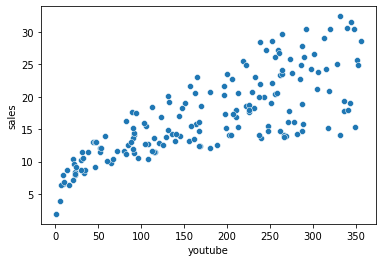

In [ ]:
#Se crea una trama dispersa para visualizar la relación entre la variable independiente 'youtube' y 'sales'
sns.scatterplot(x='youtube',
                y='sales', data=df)

In [ ]:
#Se procede a agrupar las caracteristicas en variables, dado que 'x' contiene variables independientes y 'y' una variable dependiente.

X = df.drop('sales',axis= 1) #Agrupa las variables independientes
y = df['sales'] #Agrupa las variables dependientes
print(X) #Se imprime para observar el resultado
print(y) #""

     youtube  facebook  newspaper
0      84.72     19.20      48.96
1     351.48     33.96      51.84
2     135.48     20.88      46.32
3     116.64      1.80      36.00
4     318.72     24.00       0.36
..       ...       ...        ...
166    45.84      4.44      16.56
167   113.04      5.88       9.72
168   212.40     11.16       7.68
169   340.32     50.40      79.44
170   278.52     10.32      10.44

[171 rows x 3 columns]
0      12.60
1      25.68
2      14.28
3      11.52
4      20.88
       ...  
166     9.12
167    11.64
168    15.36
169    30.60
170    16.08
Name: sales, Length: 171, dtype: float64


In [ ]:
#Se crea un conjunto de datos para entrenamiento y pruebas del modelo, y se ajusta el tamaño de la prueba al 30% de los datos. Por tanto el conjunto de datos de
#entrenamiento queda al 70%.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [ ]:
#Se procede a crear un modelo de regresion lineal
model = LinearRegression() #con este metodo se cre un modelo de RL simple, y este se importa de la clase sklearn.linear_model

In [ ]:
#Se procede a ajustar el modelo con los datos de entrenamiento anteriormente configurados.
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Se realizan predicciones sobre el conjunto de datos de prueba
predictions = model.predict(X_test)

#Se evalua el modelo con metricas de error absoluto medio y error cuadratico medio. Cabe resaltar que entre menor de el numero, mejor sera el rendimiento del modelo.
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

#Comentario: Si se desea ignorar los valores anormales del dataset, MAE es una mejor opción, pero si se quiere incluirlos en una función de perdida, RMSE es la mejor opción.

mean_squared_error :  4.562499744899795
mean_absolute_error :  1.3984379283091775


Con el entrenamiento de un modelo bajo el uso de funciones de RL de la libreria SKLEARN, se obtiene que, bajo el entrenamiento de un modelo con un dataset repartido a: 70% de datos de 'train' y 30% de datos de 'test', el valor del error cuadratico medio en este caso es de 4.562, generando menor precisión que el modelo de RL entrenado inicialmente.

## Comparación entre los dos modelos:

En general, un valor de función de costo más bajo indica un mejor ajuste del modelo a los datos de entrenamiento. Sin embargo, la elección del mejor valor dependerá del contexto y de los objetivos del análisis.

En este caso, dado que la función de costo es más baja que el error cuadrático medio, podríamos decir que el ajuste del modelo es mejor en términos de la función de costo. Sin embargo, es importante tener en cuenta que la comparación de ambos valores puede ser más relevante dentro de un mismo contexto y con un conjunto de datos específico, por lo que es importante evaluar y comparar los resultados en relación a los objetivos y el contexto del análisis.

## Creditos y referencias del primer punto:

1. https://medium.com/analytics-vidhya/basics-and-beyond-linear-regression-c12d99a4df35
2. https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/
3. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

# Punto 3 - Punto 1 Con Optimizadores

## Optimizadores

La variable X_train  contiene un conjunto de datos de entrenamiento, y se utiliza el método shape para obtener la forma de la matriz. La propiedad shape devuelve una tupla que contiene las dimensiones de la matriz, y se accede al número de columnas de la matriz de entrenamiento utilizando el índice 1 en la tupla.

El valor resultante de input_dim_point1 es el número de columnas de la matriz de entrenamiento, lo que se usa como entrada para el modelo de aprendizaje automático.

La variable num_clases_point1 se inicializa con un valor de 1, lo que sugiere que este modelo para  estar diseñado para realizar una tarea de regresión.

In [ ]:
input_dim_point1 = X_train.shape[1]
num_clases_point1 = 1
print(input_dim_point1)

3


Importar librerias necesarias para creacion del modelo con optimizadores 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

La función model_Nadam_point1 crea un modelo secuencial y agrega tres capas densas a la red neuronal. La primera capa densa tiene 10 neuronas y utiliza la función de activación 'relu'. La segunda capa densa también tiene 10 neuronas y utiliza la misma función de activación. La última capa densa tiene un número de neuronas igual al número de clases definido en num_clases_point1, que como se mencionó en la pregunta anterior, es 1. Esta capa utiliza una función de activación lineal.

El método summary() se utiliza para imprimir un resumen de la arquitectura del modelo.

El optimizador utilizado en este modelo es el algoritmo de optimización Nadam, que se inicializa con un learning_rate de 0.001, beta_1 de 0.9, beta_2 de 0.999 y epsilon de 1e-07. Este optimizador es utilizado para minimizar la función de pérdida definida como 'mse', que corresponde a la función de error cuadrático medio.
La función de pérdida se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y la fase de prueba. Además, se especifica la métrica de precisión o accuracy para evaluar el rendimiento del modelo durante el entrenamiento y la fase de prueba.

In [ ]:
def model_Nadam_point1():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim_point1, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases_point1, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt ,metrics=['accuracy'])

  return model

La función model_Adam_point1 crea un modelo secuencial y agrega tres capas densas a la red neuronal, con la misma configuración que el modelo anterior. La primera capa densa tiene 10 neuronas y utiliza la función de activación 'relu'. La segunda capa densa también tiene 10 neuronas y utiliza la misma función de activación. La última capa densa tiene un número de neuronas igual al número de clases definido en num_clases_point1.
El método summary() se utiliza para imprimir un resumen de la arquitectura del modelo.

En este modelo, el optimizador utilizado es el algoritmo de optimización Adam, que se inicializa con un learning_rate de 0.1. El learning rate es un parámetro que controla la velocidad de aprendizaje del modelo y puede ser ajustado para obtener un mejor rendimiento.

In [ ]:
def model_Adam_point1():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim_point1, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases_point1, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
 
  model.compile(loss = 'mse', optimizer = opt, metrics=['accuracy'])

  return model

La función model_Adamax_point1 crea un modelo secuencial y agrega dos capas densas a la red neuronal. La primera capa densa tiene 10 neuronas y utiliza la función de activación 'relu'. La última capa densa tiene un número de neuronas igual al número de clases definido en num_clases_point1, que como se mencionó anteriormente, es 1. Esta capa utiliza una función de activación lineal.

El método summary() se utiliza para imprimir un resumen de la arquitectura del modelo.

En este modelo, el optimizador utilizado es el algoritmo de optimización Adamax, que se inicializa con un learning_rate de 0.001, beta_1 de 0.9, beta_2 de 0.999 y epsilon de 1e-07. Este optimizador es utilizado para minimizar la función de pérdida definida como 'mse', que corresponde a la función de error cuadrático medio

In [ ]:
def model_Adamax_point1():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim_point1, activation='relu'))
  model.add(Dense(num_clases_point1, activation='linear'))

  model.summary()

  opt =tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)
 
  model.compile(loss = 'mse', optimizer = opt, metrics=['accuracy'])

  return model

Crea una instancia del modelo definido por la función model_Adam_point1() y lo asigna a la variable modelA1_Adam_point1.

In [ ]:
modelA1_Adam_point1 = model_Adam_point1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelA2_Nadam_point1 = model_Nadam_point1()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelA2_Adamax_point1 = model_Adamax_point1()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Se ajusta el modelo modelA1_Adam_point1 a los datos de entrenamiento X_train e y_train, utilizando el optimizador Adam y la función de pérdida MSE, durante 250 épocas. El tamaño de lote utilizado en cada iteración del entrenamiento es de 100 observaciones.

Además, se utiliza el conjunto de datos de validación (X_test, y_test) para evaluar el modelo después de cada época. La evaluación se realiza utilizando la misma función de pérdida y métrica de precisión que se especificó en la compilación del modelo.

El resultado de esta operación se almacena en la variable history1_point1, que contiene información sobre la evolución del error de entrenamiento y validación a lo largo de las épocas

In [ ]:
history1_point1 = modelA1_Adam_point1.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
history2_point1 = modelA2_Nadam_point1.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
history3_point1 = modelA2_Adamax_point1.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=250, batch_size=100, verbose=0)

Se importa la función mean_squared_error de la librería sklearn.metrics. Esta función se utiliza para calcular el error cuadrático medio (MSE) entre dos conjuntos de datos.

A continuación, se utilizan los modelos modelA1_Adam_point1, modelA2_Nadam_point1 y modelA2_Adamax_point1 previamente definidos para hacer predicciones sobre el conjunto de datos de prueba X_test. Las predicciones se almacenan en las variables y_pred_point1_Adam, y_pred_point1_Nadam y y_pred_point1_Adamax, respectivamente.

Finalmente, se calcula el MSE entre las etiquetas verdaderas y_test y las predicciones realizadas por cada modelo. Estos resultados se almacenan en las variables mse_adam_point1, mse_Nadam_point1 y mse_adamax_point1, y se imprimen en la pantalla 

In [ ]:
from sklearn.metrics import mean_squared_error

# Predecir con el modelo
y_pred_point1_Adam = modelA1_Adam_point1.predict(X_test)
y_pred_point1_Nadam = modelA2_Nadam_point1.predict(X_test)
y_pred_point1_Adamax = modelA2_Adamax_point1.predict(X_test)
# Calcular el MSE
mse_adam_point1 = mean_squared_error(y_test, y_pred_point1_Adam)
mse_Nadam_point1 = mean_squared_error(y_test, y_pred_point1_Nadam)
mse_adamax_point1 = mean_squared_error(y_test, y_pred_point1_Adamax)

print('Mean Squared Error Adam punto 1  :', mse_adam_point1)
print('Mean Squared Error Nadam punto 1  :', mse_Nadam_point1)
print('Mean Squared Error Adamax punto 1  :', mse_adamax_point1)

2/2 [==============================] - 0s 4ms/step
Mean Squared Error Adam punto 1  : 2.0335482176514437
Mean Squared Error Nadam punto 1  : 4.523670575284513
Mean Squared Error Adamax punto 1  : 16.834591251156823


## Modelo de regresion

In [ ]:
#Se procede a crear un modelo de regresion lineal
model = LinearRegression() #con este metodo se cre un modelo de RL simple, y este se importa de la clase sklearn.linear_model

In [ ]:
#Se procede a ajustar el modelo con los datos de entrenamiento anteriormente configurados.
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Se realizan predicciones sobre el conjunto de datos de prueba
predictions = model.predict(X_test)

#Se evalua el modelo con metricas de error absoluto medio y error cuadratico medio. Cabe resaltar que entre menor de el numero, mejor sera el rendimiento del modelo.
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

#Comentario: Si se desea ignorar los valores anormales del dataset, MAE es una mejor opción, pero si se quiere incluirlos en una función de perdida, RMSE es la mejor opción.

mean_squared_error :  4.562499744899795
mean_absolute_error :  1.3984379283091775


Con el entrenamiento de un modelo bajo el uso de funciones de RL de la libreria SKLEARN, se obtiene que, bajo el entrenamiento de un modelo con un dataset repartido a: 70% de datos de 'train' y 30% de datos de 'test', el valor del error cuadratico medio en este caso es de 4.562, generando menor precisión que el modelo de RL entrenado inicialmente.

## Comparación entre los dos modelos:
En general, un valor de función de costo más bajo indica un mejor ajuste del modelo a los datos de entrenamiento. Sin embargo, la elección del mejor valor dependerá del contexto y de los objetivos del análisis.

En este caso, dado que la función de costo es más baja que el error cuadrático medio, podríamos decir que el ajuste del modelo es mejor en términos de la función de costo. Sin embargo, es importante tener en cuenta que la comparación de ambos valores puede ser más relevante dentro de un mismo contexto y con un conjunto de datos específico, por lo que es importante evaluar y comparar los resultados en relación a los objetivos y el contexto del análisis.

## Creditos y referencias del primer punto:

1. https://medium.com/analytics-vidhya/basics-and-beyond-linear-regression-c12d99a4df35
2. https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/
3. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

# Punto 2

## Dataset Utilizado

Se decidió crear un modelo y entrenarlo con el dataset de cáncer cervical ([dataset](https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk)), con el modelo se podrá predecir si una mujer padece o no cáncer de cuello uterino basandose en ciertas caracteristicas (hábitos alimenticios, higiene, motivaciones, etc).

Poder predecir o diagnosticar enfermedades tan peligrosas como lo pueden ser el cáncer es una ayuda muy valiosa para los pacientes que las padecen ya que pueden empezar el tratamiento correspondiente lo mas pronto posible y de esta manera salvar muchas vidas.

La salida de este modelo es un valor booleano que indica si una paciente tiene o no cáncer de cuello uterino, esto hace que cuente como un problema de clasificación binaria, este tipo de problemas se trabajan idealmente implementando un modelo con regresion logistica lineal que permite evaluar la probabilidad que tiene cada mujer de tener o no cancer de cuello uterino, según las caracteristicas antes mencionadas de las mujeres encuestadas.

Este dataset cuenta con 18 atributos más una salida (clase):

1. behavior_eating
2. behavior_personalHygine
3. intention_aggregation
4. intention_commitment
5. attitude_consistency
6. attitude_spontaneity
7. norm_significantPerson
8. norm_fulfillment
9. perception_vulnerability
10. perception_severity
11. motivation_strength
12. motivation_willingness
13. socialSupport_emotionality
14. socialSupport_appreciation
15. socialSupport_instrumental
16. empowerment_knowledge
17. empowerment_abilities
18. empowerment_desires
19. ca_cervix (this is class attribute, 1=has cervical cancer, 0=no cervical cancer)

In [ ]:
import pandas as pd
from pandas import read_csv
# load the dataset
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv'

df = read_csv(url, sep=",", engine='python', na_values="?")

# summarize the dataset
print(df.describe())

       behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
count            72.000000        72.000000                72.000000   
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                 3.000000   
25%              10.000000        11.000000                 9.000000   
50%              10.000000        13.000000                11.000000   
75%              10.000000        15.000000                14.000000   
max              10.000000        15.000000                15.000000   

       intention_aggregation  intention_commitment  attitude_consistency  \
count              72.000000             72.000000             72.000000   
mean                7.902778             13.347222              7.180556   
std                 2.738148              2.374511              1.522844   
min                 2.000000              6.000

Visualizamos el dataset

In [ ]:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


Revisamos los dataypes de cada columna

In [ ]:
print(df.dtypes)

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object


Buscamos datos nulos en el dataset

In [ ]:
df.isnull().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

Ahora separamos el dataset en entradas (x)y salida (y), luego se divide en sus respectivas variables de entrenamiento y test. Como es habitual eñ 80% del dataset va a pertenecer al entrenamiento y el resto (20%) al test.

In [ ]:
from sklearn.model_selection import train_test_split

y = df['ca_cervix']
x = df.drop(['ca_cervix'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

## Código

En la implementación del código se inicia con la creación de la clase CustomLogisticRegression, donde se definen los métodos a usar. En primer lugar se entrena con el uso de la gradiente descendiente, tomando en cuenta la perdida de cada epoca y la taza de aprendizaje, actualizando en cada entrenamiento los pesos y el bias del modelo y aproximando una predicción menor o igual a 0,5 a 0 y a 1 en caso contrario, y guardando los datos de las precisiones de entrenamiento y testeo.
Para el cálculo de las gradientes, se deriva la pérdida, siendo esta el real valor del error.
Para la actualización de los pesos, se tiene en cuanta el error y el learning rate, restandole al valor actual del parametro, el producto del error por el learning rate.
Para las predicciones, se utiliza el método predict, el cual se encarga de multiplicar las entradas por sus pesos y sumarle el bias, e ingresar el resultado en la ecuación sigmoide.
Por último, se definen la ecuación sigmoide, y dos métodos para transformar los valores de 'x' y 'y' según se necesitan en el resto de métodos.

In [ ]:
import copy
import numpy as np
from sklearn.metrics import accuracy_score

class CustomLogisticRegression():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []
        self.test_accuracies = []

    def fitGradDesc(self, x, y, x_t, y_t, epochs):
        x = self._transform_x(x)
        y = self._transform_y(y)
        
        x_t = self._transform_x(x_t)
        y_t = self._transform_y(y_t)

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            x_dot_weights_t = np.matmul(self.weights, x_t.transpose()) + self.bias

            pred = self._sigmoid(x_dot_weights)
            pred_t = self._sigmoid(x_dot_weights_t)

            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            pred_to_class_t = [1 if p > 0.5 else 0 for p in pred_t]

            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.test_accuracies.append(accuracy_score(y_t, pred_to_class_t))

            self.losses.append(loss)


    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values.reshape(y.shape[0], 1)


Entrenamos el modelo con 120 epocas.


In [ ]:
epochs_est = 120

model = CustomLogisticRegression()

model.fitGradDesc(x_train, y_train, x_test, y_test, epochs = epochs_est)

Usamos las metricas que nos ofrece la libreria de scikit learn para medir la precision del modelo.

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8666666666666667


Con estos datos de precision ahora podemos plotear las gráficas de Accuracy_train vs Accuracy_test

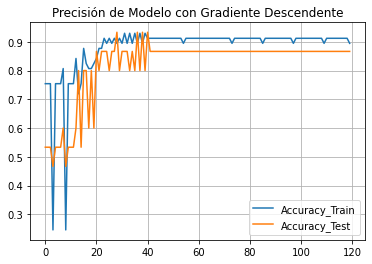

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.train_accuracies, label = 'Accuracy_Train')
plt.plot(model.test_accuracies, label = 'Accuracy_Test')
plt.title('Precisión de Modelo con Gradiente Descendente')
plt.grid()
plt.legend()
plt.show()

# Punto 3 - Punto 2 con Optimizadores

In [ ]:
input_dim = x_train.shape[1]
num_clases = 1
print(input_dim)

19


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
def model_Nadam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt ,metrics=['accuracy'])

  return model

In [ ]:
def model_Adam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
 
  model.compile(loss = 'mse', optimizer = opt, metrics=['accuracy'])

  return model

In [ ]:
def model_Adamax():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt =tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)
 
  model.compile(loss = 'mse', optimizer = opt, metrics=['accuracy'])

  return model

In [ ]:
modelA1_Adam = model_Adam()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelA2_Nadam = model_Nadam()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                200       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelA2_Adamax = model_Adamax()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                200       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = modelA1_Adam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
history2 = modelA2_Nadam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
history3 = modelA2_Adamax.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

Usamos las metricas que nos ofrece la libreria de scikit learn para medir la precision del modelo.

In [ ]:
accuracy = history1.history['accuracy'][-1]
print("La precisión final del modelo Adam es:", accuracy)


La precisión final del modelo Adam es: 0.7543859481811523


In [ ]:
accuracy_2 = history2.history['accuracy'][-1]
print("La precisión final del modelo Nadam  es:", accuracy_2)

La precisión final del modelo Nadam  es: 0.9298245906829834


In [ ]:
accuracy_3 = history3.history['accuracy'][-1]
print("La precisión final del modelo Adamax es:", accuracy_3)

La precisión final del modelo Adamax es: 0.5438596606254578


Se puede observar que el accuracy mejor dado es el Nadam con 0.92 y comparado con el anterior modelo del punto 2 , es mejor usar este optimizador

Con estos datos de precision ahora podemos plotear las gráficas de Accuracy_train vs Accuracy_test

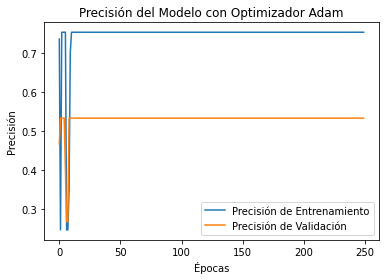

In [ ]:
import matplotlib.pyplot as plt

train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

plt.plot(train_acc, label='Precisión de Entrenamiento')
plt.plot(val_acc, label='Precisión de Validación')
plt.title('Precisión del Modelo con Optimizador Adam')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


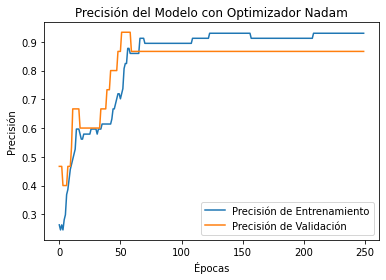

In [ ]:
import matplotlib.pyplot as plt

train_acc_2 = history2.history['accuracy']
val_acc_2 = history2.history['val_accuracy']

plt.plot(train_acc_2, label='Precisión de Entrenamiento')
plt.plot(val_acc_2, label='Precisión de Validación')
plt.title('Precisión del Modelo con Optimizador Nadam')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

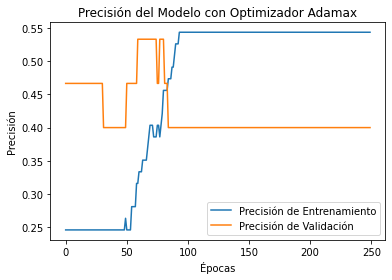

In [ ]:
import matplotlib.pyplot as plt

train_acc_3 = history3.history['accuracy']
val_acc_3 = history3.history['val_accuracy']

plt.plot(train_acc_3, label='Precisión de Entrenamiento')
plt.plot(val_acc_3, label='Precisión de Validación')
plt.title('Precisión del Modelo con Optimizador Adamax')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Segunda parte punto 2 (Logistic Regression Sklearn)

Ahora se construirá un modelo usando la libreria sklearn mas especificamente la la herramienta "LogisticRegression". Una vez entrenado este nuevo modelo, se compararán los niveles de precision entre este nuevo y el anterior creado desde 0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model2 = LogisticRegression(solver = 'liblinear', max_iter = epochs_est)
model2.fit(x_train, y_train)
pred_model2 = model2.predict(x_test)
accuracy_model2 = accuracy_score(y_test, pred_model2)
print(accuracy_model2)

0.8


## Matrices de Confusión

Para comparar los dos modelos, se crearon matrices de confusion para cada modelo, con estas se puede realizar un mejor analisis de los resultados de los modelos.

In [ ]:
import itertools
def plot_confusion_matrix(cm, num_classes, opt, normalize=False,cmap=plt.cm.BuGn):      
      classes = ['Negative', 'Positive']

      plt.figure(figsize = (5,5))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title('Confusion Matrix ' + opt)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,2)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predictions')

### Confusion Matrix GD

Confusion Matrix GD 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.90      0.86      0.86        15
weighted avg       0.89      0.87      0.86        15



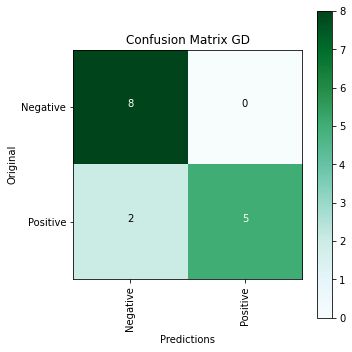

In [ ]:
from sklearn import metrics

print("Confusion Matrix GD \n")

conf_mat_1 = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mat_1, 2, 'GD')
print(metrics.classification_report(y_test, pred))

Según lo dado por la matriz, se tiene que en los datos de testeo, se clasifican bien los datos positivos, sin embargo, de los datos negativos se clasifican mal 2 de los 10 datos, pero para el dataset utilizado, se requiere que en datos negativos no haya personas clasificadas erroneamente, pues una salida predicted como 0 y en realidad es 1, en este contexto podria costarle la vida al paciente.

### Confusion Matrix Sklearn logistic regression model


Matriz Confusión con Sklearn 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



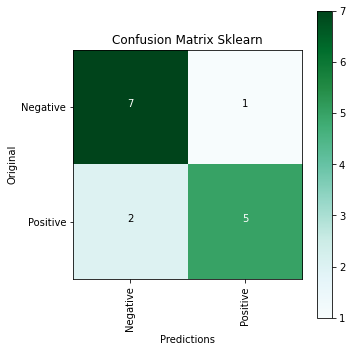

In [ ]:
print("Matriz Confusión con Sklearn \n")
conf_mat_2 = metrics.confusion_matrix(y_test, pred_model2)
plot_confusion_matrix(conf_mat_2, 2, 'Sklearn')
print(metrics.classification_report(y_test, pred_model2))

Los dos modelos tienen un comportamiento similar, sin embargo, debido a la cantidad de epocas que se definieron es mejor el desempeño del modelo creado desde 0 que el dado por la libreria Sklearn, lo más probable es que su comportamineto mejore y supere al nuestro si se aumenta el número de epocas, o si se usa un solver diferente.

# Punto 3 Tabla

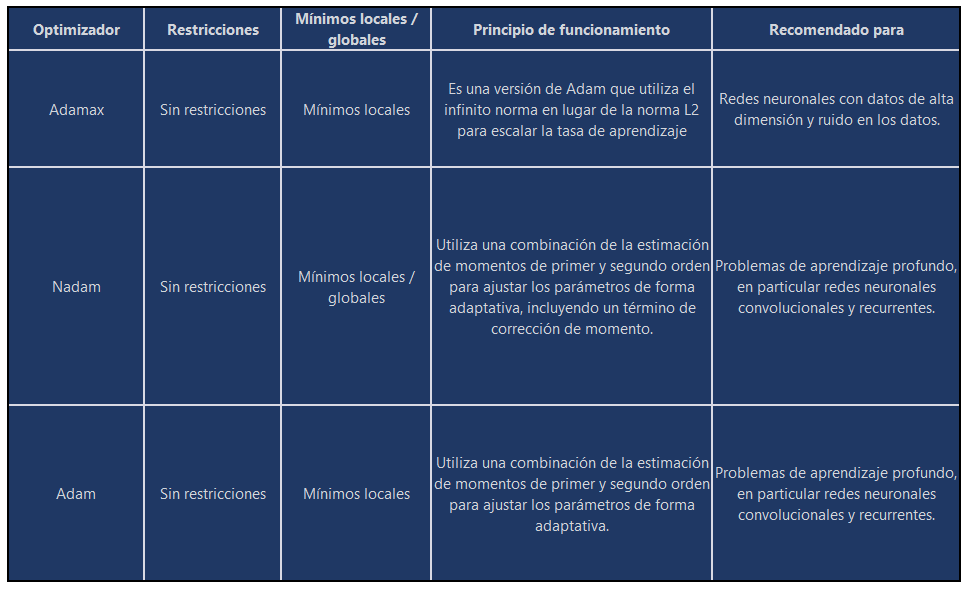

Cuando se dice que un optimizador como Adam **no tiene restricciones, significa que no impone ninguna limitación en los valores que pueden tomar los parámetros del modelo** durante el proceso de optimización. Esto significa que los valores de los parámetros pueden variar libremente dentro de su rango permitido y no se aplican restricciones adicionales durante la optimización

Por otro lado, cuando se dice que **un optimizador tiene mínimos locales, significa que su capacidad para encontrar el mínimo global de una función es limitada**. En cambio, el optimizador puede converger a un mínimo local, que es el mínimo más cercano al punto de partida del algoritmo de optimización. 

En general, por ejemplo espera que Adam encuentre un mínimo local cercano a su punto de inicio, pero no necesariamente el mínimo global de la función de pérdida.

En la optimización matemática y en el aprendizaje automático, el término "mínimo" se refiere al valor más bajo de una función de pérdida o costo que se puede alcanzar mediante la variación de los parámetros del modelo. **El objetivo del proceso de optimización es encontrar los valores de los parámetros que minimizan la función de pérdida y, por lo tanto, maximizan el rendimiento del modelo**. Sin embargo, una función de pérdida puede tener varios mínimos diferentes. 

**Un mínimo local es el valor más bajo de la función de pérdida en una región local de los parámetros**. En otras palabras, **es el punto más bajo que se puede alcanzar a partir de un conjunto particular de valores de parámetros**, pero no necesariamente el valor más bajo posible en todo el espacio de parámetros. Por otro lado, el mínimo global es el valor más bajo de la función de pérdida en todo el espacio de parámetros. Este es el punto más bajo que se puede alcanzar en la función de pérdida, independientemente de los valores iniciales de los parámetros o el camino seguido por el algoritmo de optimización

*En resumen*, **el mínimo local es el punto más bajo de la función de pérdida en una región local de los parámetros**, mientras que **el mínimo global es el punto más bajo de la función de pérdida en todo el espacio de parámetros**. La capacidad de un optimizador para encontrar el mínimo global es importante porque es lo que asegura que el modelo tenga el mejor rendimiento posible en términos de la función de pérdida.

Links de referencia punto 3:
* Adam
  * https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
  * https://keras.io/api/optimizers/adam/
  * https://arxiv.org/pdf/1609.04747.pdf
* Nadam
  * https://arxiv.org/pdf/1412.6980.pdf
  * https://interactivechaos.com/es/manual/tutorial-de-machine-learning/gradient-descent
  * http://cs229.stanford.edu/proj2015/054_report.pdf
  * https://machinelearningmastery.com/gradient-descent-optimization-with-nadam-from-scratch/

* Adamax
  * https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adamax
  * https://machinelearningmastery.com/gradient-descent-optimization-with-adamax-from-scratch/


# Punto 4

Se decidió trabajar con el [dataset heart disease](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset) ya este tipo de enfermedades es la primera causa de muerte en el mundo  [(17.5 millones de fallecimientos al año)](https://https://www.amgen.es/enfermedades-tratadas/hipercolesterolemia/enfermedad-cardiovascular-esp#:~:text=La%20enfermedad%20cardiovascular%20es%20la,29%25%20de%20los%20decesos%20totales.). El diagnostico temprano de estas enfermedades extiende la expectativa de vida de los pacientes que las padecen.

Info Dataset: 76 atributos (de los cuales se usa un subconjunto de 14, que es al que se refieren los experimentos publicados), 1 salida (tiene o no una enfermedad cardiaca)

## Modelo 1

## Imports


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import itertools

In [ ]:
dataset_url='https://raw.githubusercontent.com/LuisFernandoPareja/HeartDataSet/main/heart.csv'
pd.set_option('display.max_columns', None)
dataset = pd.read_csv(dataset_url)
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Normalization
Definimos una función para poder normalizar los valores del dataset entre dos valores escogidos (en este caso normalizaremos entre 0 y 1).

In [ ]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

Se calculan los maximos y minimos de cada entrada y de la salida, para normalizar el dataset entre 0 y 1, se usa la normalización entre 0 y 1.

In [ ]:
max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Split the dataset

Se separa el dataset en entradas (x) y salidas (y), tomando en cuenta que la columna llamada target es la salida del dataset. Se le realiza un reshape a las salidas para que tenga forma (num, 1). Posteriormente se hace la separación del dataset un 80% del dataset es para el entrenamiento y el otro 20% restante es para el test.

In [ ]:
x = np.array(data.drop(['target'], axis = 1))
y = np.array(data['target']).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

## Modelo
Empezamos definiendo las funciones sigmoid y relu junto a sus derivadas, ambas funciones las usaremos 

In [ ]:
# Avoid division by zero
epsilon = np.finfo(float).eps
 
# Sigmoid function and its differentiation
def sigmoid(z):
    return 1/(1+np.exp(-z.clip(-500, 500)))
def dsigmoid(z):
    s = sigmoid(z)
    return 2 * s * (1-s)
 
# ReLU function and its differentiation
def relu(z):
    return np.maximum(0, z)
def drelu(z):
    return (z > 0).astype(float)

Se crea la función de perdida (binary cross entropy), ya que nuestro problema es de clasificacion binaria.

In [ ]:
def cross_entropy(y, yhat):
    """Binary cross entropy function
        L = - y log yhat - (1-y) log (1-yhat)
    """
    return -(y.T @ np.log(yhat.clip(epsilon)) + (1-y.T) @ np.log((1-yhat).clip(epsilon))) / y.shape[1]
 
def d_cross_entropy(y, yhat):
    """ dL/dyhat """
    return - np.divide(y, yhat.clip(epsilon)) + np.divide(1-y, (1-yhat).clip(epsilon))

### Arquitectura del modelo
Se define la clase mlp, para crear una red multicapa de perceptron, donde se configura la red, en primer lugar se definen los parametros z, w, b y a para realizar los pasos hacia adelante una vez se tiene sus gradientes (dz, dw, db y da), que se calculan con la backpropagation, luego se definen algunas funciones para el calculo de los parametros:

* La función initialize se encargada de dar pesos y bias aleatorios al modelo inicial.

* La función forward calcula la salida del sistema, tomando cada entrada (a) y realizando la multiplicación por los pesos y la suma del bias (z = W a + b), e introduciendola en la función de activación, realizando la función en toda la red, siendo la salida de la red realmente su única capa.

* backward se encarga de realizar la propagación hacia atras, despues de cada paso hacia adelante, se calculan las gradientes del los pesos y de los bias, comenzando en la capa de salida hasta la capa de entrada.

* Tomando que el da de la última capa es la derivada de la perdida entre el yreal y yhat, se van calculando las gradientes de los parametros, yendo hacia la capa de entrada.

* Por último, la función update, se encarga de actualizar cada peso con su gradiente, usando la regla de actualización de la gradiente descendente, donde eta es la taza de aprendizaje (learning rate), que no es más que restarle al paramétro actual el producto de eta por la gradiente del mismo:

In [ ]:
class mlp:
    '''Multilayer perceptron using numpy
    '''
    def __init__(self, layersizes, activations, derivatives, lossderiv):
        """remember config, then initialize array to hold NN parameters without init"""
        # hold NN config
        self.layersizes = layersizes
        self.activations = activations
        self.derivatives = derivatives
        self.lossderiv = lossderiv
        # parameters, each is a 2D numpy array
        L = len(self.layersizes)
        self.z = [None] * L
        self.W = [None] * L
        self.b = [None] * L
        self.a = [None] * L
        self.dz = [None] * L
        self.dW = [None] * L
        self.db = [None] * L
        self.da = [None] * L
 
    def initialize(self, seed=42):
        np.random.seed(seed)
        sigma = 0.1
        for l, (insize, outsize) in enumerate(zip(self.layersizes, self.layersizes[1:]), 1):
            self.W[l] = np.random.randn(insize, outsize) * sigma
            self.b[l] = np.random.randn(1, outsize) * sigma
 
    def forward(self, x):
        self.a[0] = x
        for l, func in enumerate(self.activations, 1):
            # z = W a + b, with `a` as output from previous layer
            # `W` is of size rxs and `a` the size sxn with n the number of data instances, `z` the size rxn
            # `b` is rx1 and broadcast to each column of `z`
            self.z[l] = (self.a[l-1] @ self.W[l]) + self.b[l]
            # a = g(z), with `a` as output of this layer, of size rxn
            self.a[l] = func(self.z[l])
        return self.a[-1]

    def backward(self, y, yhat):
        # first `da`, at the output
        self.da[-1] = self.lossderiv(y, yhat)
        for l, func in reversed(list(enumerate(self.derivatives, 1))):
            # compute the differentials at this layer
            self.dz[l] = self.da[l] * func(self.z[l])
            self.dW[l] = self.a[l-1].T @ self.dz[l]
            self.db[l] = np.mean(self.dz[l], axis=0, keepdims=True)
            self.da[l-1] = self.dz[l] @ self.W[l].T
 
    def update(self, eta):
        for l in range(1, len(self.W)):
            self.W[l] -= eta * self.dW[l]
            self.b[l] -= eta * self.db[l]

Se define la estructura del modelo (las capas, funciones de activacion, funcion de perdida). Se calcula la pérdida actual del modelo, con los pesos y bias iniciales aleatorios, y se calcula la precisión inicial del modelo.

In [ ]:
from sklearn.metrics import accuracy_score
# Build a model
model = mlp(layersizes=[x.shape[1], 4, 3, 1],
            activations=[relu, relu, sigmoid],
            derivatives=[drelu, drelu, dsigmoid],
            lossderiv=d_cross_entropy)
model.initialize()
yhat = model.forward(x)
loss = cross_entropy(y, yhat)
print("Before training - loss value {} accuracy {}".format(loss, accuracy_score(y, (yhat > 0.5))))


Before training - loss value [[215.52261751]] accuracy 0.45544554455445546


Se definen los hiperparametros del modelo (epocas, learning rate, etc).

In [ ]:
# train for each epoch
n_epochs = 150
learning_rate = 0.005
loss1 = np.zeros(n_epochs)
accuracy1 = np.zeros(n_epochs)
loss_test1 = np.zeros(n_epochs)
accuracy_test1 = np.zeros(n_epochs)

for n in range(n_epochs):

    #Calculo perdida y precisión testeo
    model.forward(x_test)
    yhat_t = model.a[-1]
    
    loss_test1[n]=cross_entropy(y_test, yhat_t)
    accuracy_test1[n] = accuracy_score(y_test, (yhat_t > 0.5))

    #Calculo perdida y precisión entrenamiento
    model.forward(x_train)
    yhat = model.a[-1]

    accuracy1[n] = accuracy_score(y_train, (yhat > 0.5))
    loss1[n]=cross_entropy(y_train, yhat)

    #Calculo backpropagation y actualización de los pesos, tomando en base medidas de entrenamiento
    model.backward(y_train, yhat)
    model.update(learning_rate)
    loss = cross_entropy(y_train, yhat)
    print("Iteration {} - loss value {} accuracy {}".format(n, loss, accuracy_score(y_train, (yhat > 0.5))))
    
    

Iteration 0 - loss value [[172.66729543]] accuracy 0.4462809917355372
Iteration 1 - loss value [[172.4971679]] accuracy 0.4462809917355372
Iteration 2 - loss value [[172.26847968]] accuracy 0.4462809917355372
Iteration 3 - loss value [[171.94817585]] accuracy 0.4462809917355372
Iteration 4 - loss value [[171.46875264]] accuracy 0.4462809917355372
Iteration 5 - loss value [[170.70587414]] accuracy 0.4462809917355372
Iteration 6 - loss value [[169.42588107]] accuracy 0.4462809917355372
Iteration 7 - loss value [[167.18862508]] accuracy 0.4462809917355372
Iteration 8 - loss value [[163.27453967]] accuracy 0.7355371900826446
Iteration 9 - loss value [[156.89897933]] accuracy 0.743801652892562
Iteration 10 - loss value [[147.55419204]] accuracy 0.731404958677686
Iteration 11 - loss value [[137.51006539]] accuracy 0.7851239669421488
Iteration 12 - loss value [[130.59033012]] accuracy 0.7768595041322314
Iteration 13 - loss value [[130.47499831]] accuracy 0.8140495867768595
Iteration 14 - loss

Gráfica de perdida y precision

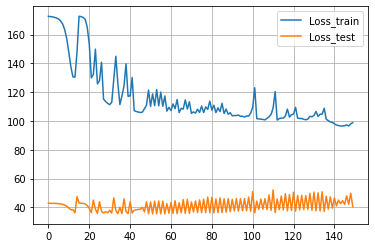

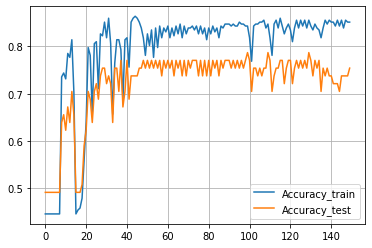

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss1, label = 'Loss_train')
plt.plot(loss_test1, label = 'Loss_test')
plt.legend()
plt.grid()
plt.show()

plt.plot(accuracy1, label = 'Accuracy_train')
plt.plot(accuracy_test1, label = 'Accuracy_test')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Scores: ')
print("Training set score: {:.3f}".format(accuracy1[-1]))
print("Test set score: {:.3f}".format(accuracy_test1[-1]))

Scores: 
Training set score: 0.851
Test set score: 0.754


## Modelo 2 (MLP Sklearn)

Con ayuda de la libreria Sklearn, se implementa una red neuronal para clasificación, para esto se intenta tener los mismos hiperparámetros del modelo creado a mano, para ser justos en su comparación, por lo que se cambia su numero de capas ocultas, y de neuronas en la mismas, su número de epocas, su función de activación se usa la relu y para la de salida logisica (sigmoid) y tambien su optimizador, pues el de defecto es adam, que mucho más potente qu la gradiente descendente (opt modelo creado), por lo que se pone la gradiente descendente estocaica, que dentro de las opciones (‘lbfgs’, ‘sgd’, ‘adam’), se considera la más justa, para hacer la más parecida al gradiente descendiente, se usa un batch_size grande, igual a la cantidad de datos de entrenamiento (61).

Luego se entrena con los datos de entrenamiento y se calcula el score, que según la documentación de la libreria, es el la precisión promedia.

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=n_epochs,
                    hidden_layer_sizes=[4,3], 
                    solver = 'sgd',
                    batch_size = 61,
                    activation = 'relu')
clf.out_activation_ = 'logistic'
clf.fit(x_train, y_train)
print('Scores for MLP')
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Scores for MLP
Training set score: 0.554
Test set score: 0.508


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Matrices de confusión


Para comparar los dos modelos, se crearon matrices de confusion para cada modelo, con estas se puede realizar un mejor analisis de los resultados de los modelos.

In [ ]:
def plot_confusion_matrix(cm, num_classes, opt, normalize=False,cmap=plt.cm.Reds):
      
      import itertools
      
      classes = ['Negativo', 'Positivo']

      plt.figure(figsize = (5,5))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title('Matriz de Confusión ' + opt)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,2)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Real')
      plt.xlabel('Predicciones')

## Confusion Matrix Modelo 1

Matriz Confusión Modelo 1 

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        30
         1.0       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



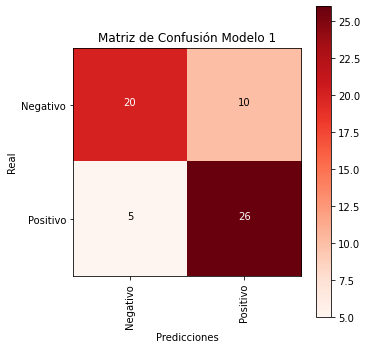

In [ ]:
from sklearn import metrics

print("Matriz Confusión Modelo 1 \n")

yhat1 = model.forward(x_test)

conf_mat_1 = metrics.confusion_matrix(y_test, (yhat1 > 0.5))
plot_confusion_matrix(conf_mat_1, 2, 'Modelo 1')
print(metrics.classification_report(y_test, (yhat1 > 0.5)))

## Confusion Matrix Modelo 2 (MLP Sklearn)

Matriz Confusión Modelo Sklearn 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        30
         1.0       0.51      1.00      0.67        31

    accuracy                           0.51        61
   macro avg       0.25      0.50      0.34        61
weighted avg       0.26      0.51      0.34        61



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


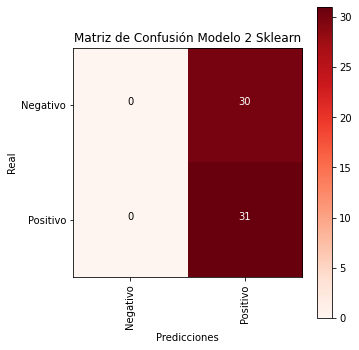

In [ ]:
print("Matriz Confusión Modelo Sklearn \n")

yhat_sk = clf.predict(x_test)

conf_mat_sk = metrics.confusion_matrix(y_test, (yhat_sk > 0.5))
plot_confusion_matrix(conf_mat_sk, 2, 'Modelo 2 Sklearn')
print(metrics.classification_report(y_test, (yhat_sk > 0.5)))

En cuanto al desempeño del primer modelo se obtiene que cuenta con un número bajo de falsos negativos, sin embargo, aunque sea bajo, lo ideal es que sea 0 para que no sea mortal en los resultados equivocados.En cuento a los falsos positivos, se tiene una gran cantidad, pero estos solo infunden en la cantidad de examenes médicos que se van a tener que llevar a cabo para descartar.

Ahora observando el segundo modelo de Sklearn aunque cuente con una precisión muy baja, no tendría un riesgo grande, pues no hay falsos negativos, sin embargo, tampoco tendría mayor utilidad, pues pasa a todas las personas como que tienen enfermedades cardiacas, por l oque se tendria que realizar examenes a todos.

El aumento de neuronas y capas en los problemas de clasificación, puede mejorar el rendimiento de la red, permitiendo un análisis más profundo por parte del modelo, sin embargo, el pasarse con las mismas y el número de epócas puede provacar un sobre entrenamiento, donde solo quedarían bien clasificados los datos de entrenamiento y la red no serviria para recibir datos nuevos, por lo que sería obsoleta. Aunque la pérdida y precisión son buenas medidas para problemas de clasificación, el uso de la matriz de confusión nos permite ver mejor si el modelo sirve o no para la aplicación que lo estamos usando, para lo cual tambien es de vital importancia entender correctamente nuestro dataset, para tomar decisiones sobre que requerimos minizar, si los falsos positivos o los falsos negativos.

# Punto 5

**Data Set** :[Student](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.linalg import svd
from sklearn.decomposition import PCA

#leer un archivo CSV desde una URL y crear un DataFrame de Pandas que contiene los datos del archivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')


In [ ]:
#carga un conjunto de datos de estudiantes y alcohol desde una URL y crea un DataFrame de Pandas
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv"
pd.set_option('display.max_columns', None)
dataset = pd.read_csv(url)
dataset.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
#Asisgnar DataFrame a las variables X y Y
X = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime']]
y = df['G3']


In [ ]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
# La variable X contiene las características y la variable y contiene la variable de respuesta
# test_size = 0.3 indica que el 30% de los datos se utilizarán para el conjunto de prueba
# random_state se establece en 0 para que los resultados sean reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear un modelo de regresión lineal y ajustarlo al conjunto de entrenamiento
reg = LinearRegression().fit(X_train, y_train)

# Predecir los valores de y para el conjunto de prueba utilizando el modelo ajustado
y_pred = reg.predict(X_test)


In [ ]:
# Calcular el RMSE entre los valores reales y los valores predichos
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE con todas las variables de entrada:', rmse_orig)


RMSE con todas las variables de entrada: 5.447230239494682


In [ ]:
#SVD reduccion 2
# Realizar la descomposición en valores singulares (SVD) de los datos originales
U, s, VT = svd(X)
# Utilizar las dos primeras componentes principales para reconstruir los datos originales 
X_2 = U[:, :2] @ np.diag(s[:2]) @ VT[:2, :]
# Dividir los datos reducidos en un conjunto de entrenamiento y un conjunto de prueba
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=0)
# Crear un modelo de regresión lineal y ajustarlo al conjunto de entrenamiento
reg_2 = LinearRegression().fit(X_train_2, y_train)
# Predecir los valores de y para el conjunto de prueba utilizando el modelo ajustado
y_pred_2 = reg_2.predict(X_test_2)


In [ ]:
# Calcular el RMSE entre los valores reales y los valores predichos
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
print('RMSE con 2 variables de entrada:', rmse_2)


RMSE con 2 variables de entrada: 5.374443215391654


In [ ]:
#PCA reduccion 2

# Realizar una reducción de dimensionalidad de los datos utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Dividir los datos reducidos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
# Ajustar un modelo de regresión lineal a los datos reducidos
reg = LinearRegression().fit(X_train, y_train)
# Predecir los valores de y para el conjunto de prueba utilizando el modelo ajustado
y_pred = reg.predict(X_test)

In [ ]:
# Calcular el RMSE entre los valores reales y los valores predichos
rmse_pca_2 = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE con 2 variables de entrada:', rmse_pca_2)

RMSE con 2 variables de entrada: 5.37609134547973


In [ ]:
#SVD reduccion 1

# Utilizar la primera componente para reconstruir los datos originales
X_1 = U[:, :1] @ np.diag(s[:1]) @ VT[:1, :]
# Dividir los datos reducidos en un conjunto de entrenamiento y un conjunto de prueba
X_train_1, X_test_1, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)
# Crear un modelo de regresión lineal y ajustarlo al conjunto de entrenamiento
reg_1 = LinearRegression().fit(X_train_1, y_train)
# Predecir los valores de y para el conjunto de prueba utilizando el modelo ajustado
y_pred_1 = reg_1.predict(X_test_1)


In [ ]:
# Calcular el RMSE entre los valores reales y los valores predichos
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
print('RMSE con 1 variable de entrada:', rmse_1)


RMSE con 1 variable de entrada: 5.378508787845286


In [ ]:
#PCA reduccion 1

# Realizar una reducción de dimensionalidad de los datos utilizando PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
# Dividir los datos reducidos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
# Ajustar un modelo de regresión lineal a los datos reducidos
reg = LinearRegression().fit(X_train, y_train)
# Predecir los valores de y para el conjunto de prueba utilizando el modelo ajustado
y_pred = reg.predict(X_test)

In [ ]:
# Calcular el RMSE entre los valores reales y los valores predichos
rmse_pca_1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE con 1 variables de entrada:', rmse_pca_1)

RMSE con 1 variables de entrada: 5.376476945206435


In [ ]:
print('RMSE con todas las variables de entrada:', rmse_orig)
print('----------------------------------------')
print('RMSE - SVD con 2 variables de entrada:', rmse_2)
print('RMSE - SVD con 1 variable de entrada: ', rmse_1)
print('----------------------------------------')
print('RMSE - PCA con 2 variables de entrada:', rmse_pca_2)
print('RMSE - PCA con 1 variable de entrada:', rmse_pca_1)


RMSE con todas las variables de entrada: 5.447230239494682
----------------------------------------
RMSE - SVD con 2 variables de entrada: 5.374443215391654
RMSE - SVD con 1 variable de entrada:  5.378508787845286
----------------------------------------
RMSE - PCA con 2 variables de entrada: 5.37609134547973
RMSE - PCA con 1 variable de entrada: 5.376476945206435
